# Data Analysis - Toward a Brazilian Research Agenda in Quantum Software Engineering: A Systematic Mapping Study

**This code was updated after SBES 2025 REJECTION**. This line MUST be removed when submitting to another venue

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

aff = pd.read_csv('affiliations.csv', delimiter=';')
id = aff['ID']
institutions = aff['Institution']
typeOfInst = aff['Type of Institution']
countries = aff['Country']
authors = aff['Authors']

papers = pd.read_csv('papers.csv', delimiter=';')

## RQ1.1 - What is the temporal distribution of QSE publications?

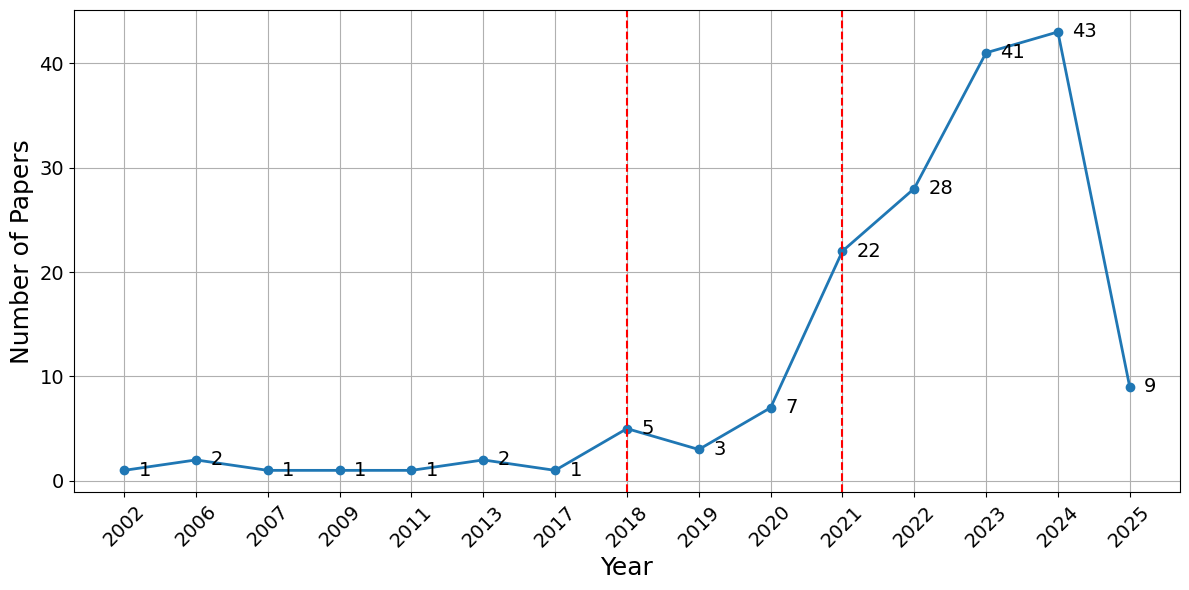

In [11]:
# Count papers per year and sort by year
year_counts = papers['Year'].value_counts().sort_index()

# Prepare data for uniform spacing
years = list(year_counts.index)
counts = list(year_counts.values)
x_positions = list(range(len(years)))

# Crie a figura e o eixo explicitamente
fig, ax = plt.subplots(figsize=(12, 6))

# Plot
ax.plot(x_positions, counts, marker='o', linestyle='-', linewidth=2)
# ax.set_title('Number of Papers per Year', fontsize=14)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Papers', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)

# Add labels slightly to the right of each point
for i, count in enumerate(counts):
    ax.text(x_positions[i] + 0.2, count, str(count), ha='left', va='center', fontsize=14)

# Add red line
if 2018 in years:
    ax.axvline(x=years.index(2018), color='red', linestyle='--', linewidth=1.5)

if 2021 in years:
    ax.axvline(x=years.index(2021), color='red', linestyle='--', linewidth=1.5)


# Set custom x-axis with actual years
ax.set_xticks(x_positions)
ax.set_xticklabels(years, rotation=45)

plt.tight_layout()

plt.show()

# Export
fig.canvas.draw()
fig.savefig('chart_year.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [12]:
for year, count in year_counts.items():
    print(f"{year}: {count}")

2002: 1
2006: 2
2007: 1
2009: 1
2011: 1
2013: 2
2017: 1
2018: 5
2019: 3
2020: 7
2021: 22
2022: 28
2023: 41
2024: 43
2025: 9


## RQ1.2 - Who are the most active institutions and authors in the field?

### Institutions

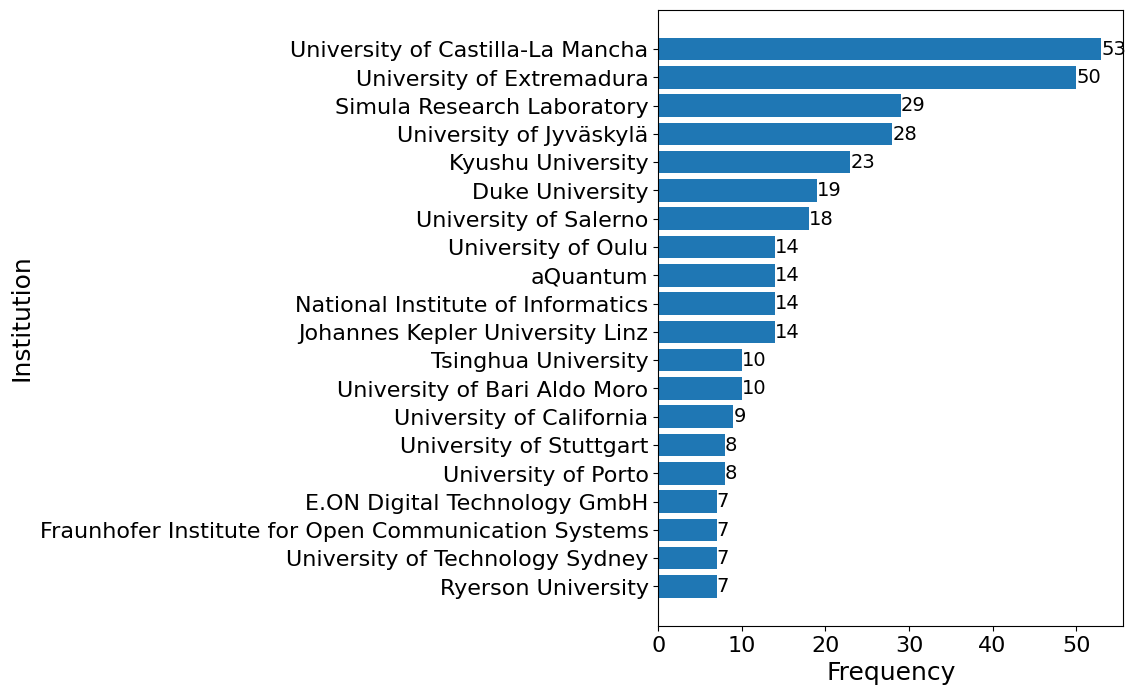

<Figure size 640x480 with 0 Axes>

In [13]:
# Get the top 20 most frequent institutions
institution_frequency = institutions.value_counts().head(20)

# Sort alphabetically (ascending) and reverse to show top at the top
# institution_frequency = institution_frequency.sort_index(ascending=True)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 8))

# Plot horizontal bars
bars = ax.barh(institution_frequency.index, institution_frequency.values)

# Invert the y-axis so that the first institution appears at the top
ax.invert_yaxis()

# Customize labels and title
ax.set_xlabel('Frequency', fontsize=18)
ax.set_ylabel('Institution', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Add values at the end of each bar
for i, value in enumerate(institution_frequency.values):
    ax.text(value, i, str(value), va='center', fontsize=14)

plt.show()

# Export and show
plt.tight_layout()
fig.canvas.draw()
fig.savefig('chart_institutions.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [14]:
institution_list = institutions.value_counts().head(20)
for institution in institution_list.index:
    print(f"{institution}, {institution_list[institution]}")

University of Castilla-La Mancha, 53
University of Extremadura, 50
Simula Research Laboratory, 29
University of Jyväskylä, 28
Kyushu University, 23
Duke University, 19
University of Salerno, 18
University of Oulu, 14
aQuantum, 14
National Institute of Informatics, 14
Johannes Kepler University Linz, 14
Tsinghua University, 10
University of Bari Aldo Moro, 10
University of California, 9
University of Stuttgart, 8
University of Porto, 8
E.ON Digital Technology GmbH, 7
Fraunhofer Institute for Open Communication Systems, 7
University of Technology Sydney, 7
Ryerson University, 7


### Authors

/tmp/ipython-input-15-1141348574.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_authors_df['Author'], rotation=45, ha='right')


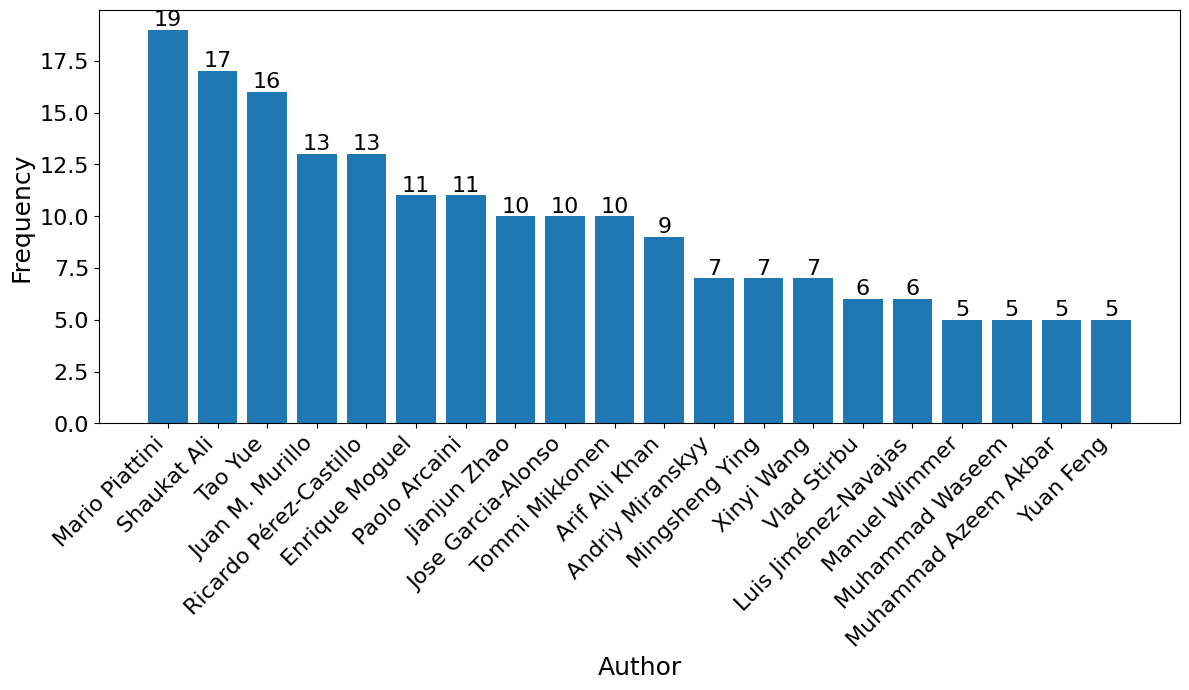

In [15]:
# Split multiple authors in a cell and remove leading/trailing spaces
all_authors = aff['Authors'].dropna().apply(lambda x: [a.strip() for a in x.split(',')])

# Flatten the list of lists into a single list of authors
authors_flat = [author for sublist in all_authors for author in sublist]

# Count the frequency of each author
author_counts = Counter(authors_flat)
top_authors = author_counts.most_common(20)

# Convert to DataFrame
top_authors_df = pd.DataFrame(top_authors, columns=['Author', 'Frequency'])

# Generating chart
fig, ax = plt.subplots(figsize=(12, 7))

bars = ax.bar(top_authors_df['Author'], top_authors_df['Frequency'], color='#1f77b4')

# Params
ax.set_xlabel('Author', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_xticklabels(top_authors_df['Author'], rotation=45, ha='right')

# Add values
for i, value in enumerate(top_authors_df['Frequency']):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=16)

plt.tight_layout()

plt.show()

# Força renderização e salva como PDF
fig.canvas.draw()
fig.savefig('chart_authors.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [16]:
for i, (author, freq) in enumerate(top_authors, start=1):
    print(f"{author}: {freq}")

Mario Piattini: 19
Shaukat Ali: 17
Tao Yue: 16
Juan M. Murillo: 13
Ricardo Pérez-Castillo: 13
Enrique Moguel: 11
Paolo Arcaini: 11
Jianjun Zhao: 10
Jose Garcia-Alonso: 10
Tommi Mikkonen: 10
Arif Ali Khan: 9
Andriy Miranskyy: 7
Mingsheng Ying: 7
Xinyi Wang: 7
Vlad Stirbu: 6
Luis Jiménez-Navajas: 6
Manuel Wimmer: 5
Muhammad Waseem: 5
Muhammad Azeem Akbar: 5
Yuan Feng: 5


### Authors and Institutions

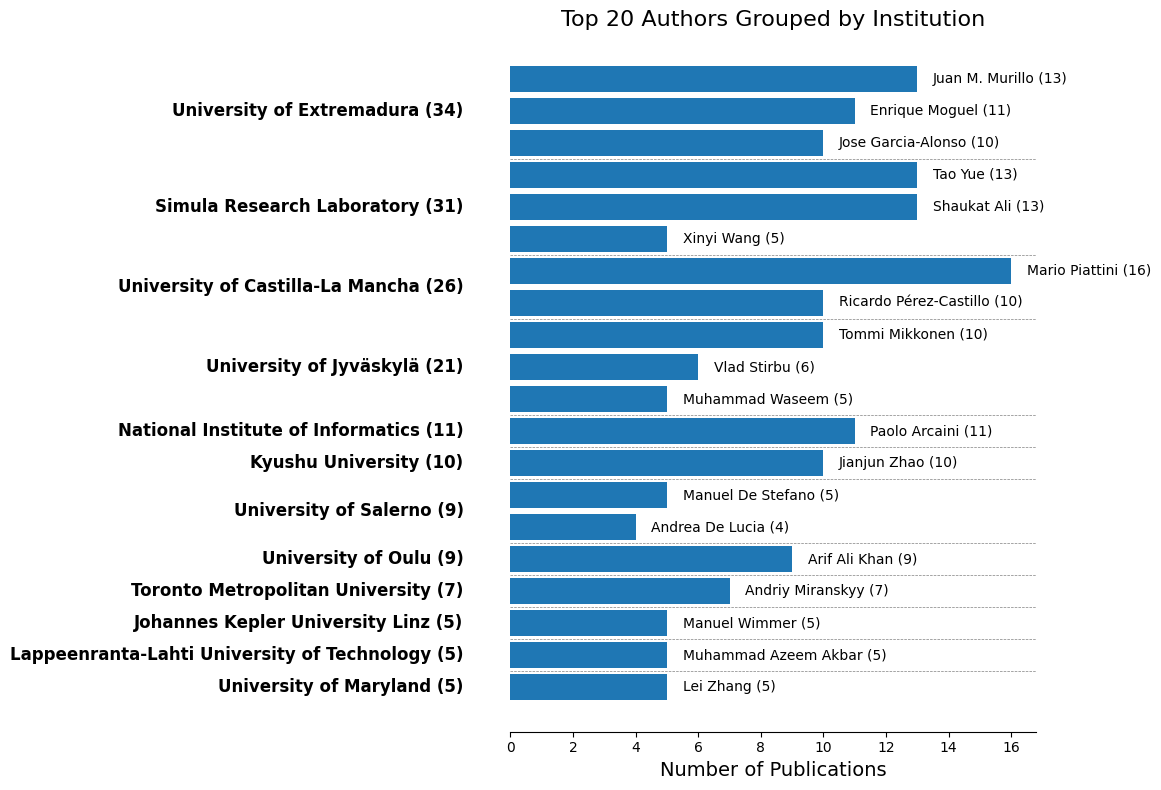

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Separar múltiplos autores e limpar espaços
aff['Authors'] = aff['Authors'].dropna().apply(lambda x: [a.strip() for a in str(x).split(',')])
aff = aff.explode('Authors')
aff['Authors'] = aff['Authors'].str.strip()

# Contar publicações por autor
author_counts = aff.groupby('Authors')['ID'].nunique().reset_index(name='Frequency')

# Instituição mais frequente por autor
main_inst = aff.groupby('Authors')['Institution'].agg(lambda x: x.value_counts().idxmax()).reset_index(name='Institution')

# Juntar dados
df = pd.merge(author_counts, main_inst, on='Authors')

# Selecionar os 20 autores com mais publicações
top_df = df.sort_values('Frequency', ascending=False).head(20)

# Ordenar instituições pela soma das publicações dos autores
inst_order = top_df.groupby('Institution')['Frequency'].sum().sort_values(ascending=False)
top_df['Institution'] = pd.Categorical(top_df['Institution'], categories=inst_order.index, ordered=True)
top_df = top_df.sort_values(by=['Institution', 'Frequency'], ascending=[True, False])
top_df.reset_index(drop=True, inplace=True)

# Gráfico
fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(top_df))

# Barras
ax.barh(y_pos, top_df['Frequency'], color='#1f77b4')

# Mostrar o nome do autor + número de publicações à direita
for i, (freq, author) in enumerate(zip(top_df['Frequency'], top_df['Authors'])):
    ax.text(freq + 0.5, i, f"{author} ({freq})", va='center', fontsize=10)

# Eixo Y oculto
ax.set_yticks([])

# Adicionar nome das instituições + total de publicações
y_offset = 0
for inst, total in inst_order.items():
    count = len(top_df[top_df['Institution'] == inst])
    if count > 0:
        mid = y_offset + (count - 1) / 2
        ax.text(-1.5, mid, f"{inst} ({int(total)})", va='center', ha='right', fontsize=12, fontweight='bold')
        # Linha separadora abaixo do grupo
        if y_offset > 0:
            ax.axhline(y=y_offset - 0.5, color='gray', linewidth=0.5, linestyle='--')
        y_offset += count

# Estilo
ax.set_xlabel('Number of Publications', fontsize=14)
ax.set_title('Top 20 Authors Grouped by Institution', fontsize=16)
ax.invert_yaxis()
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()

# Salvar como PDF
fig.canvas.draw()
# fig.savefig('chart_top20_authors_grouped_lines.pdf', format='pdf', dpi=300, bbox_inches='tight')

## RQ1.3 - Which countries are leading QSE research?

In [18]:
!pip install geopandas

In [19]:
import geopandas as gpd


url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)


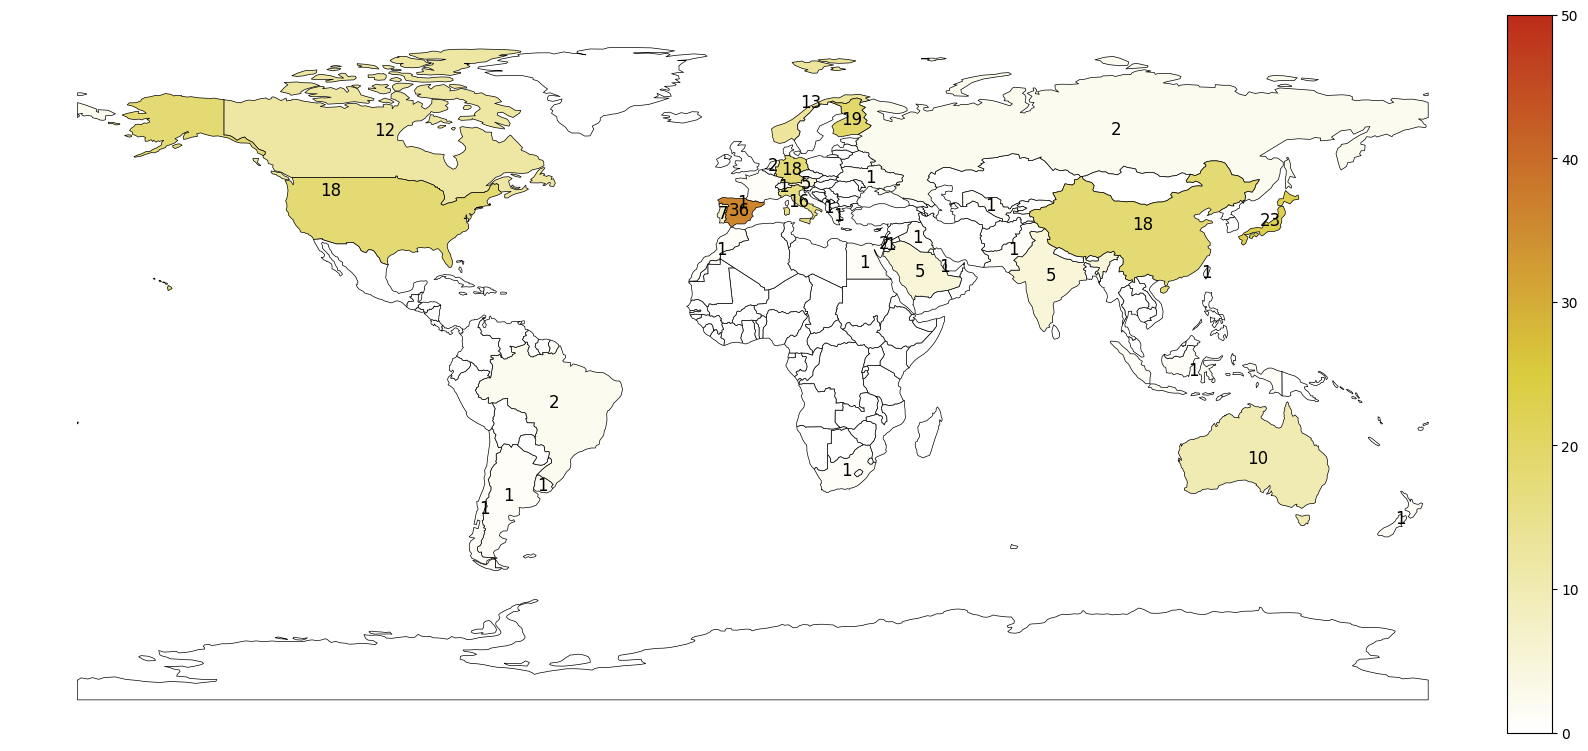

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Carrega dados
aff = aff.dropna(subset=['ID', 'Country'])
aff['Country'] = aff['Country'].str.strip().str.title()

# Renomeia países para compatibilidade com shapefile
country_rename = {
    'United States': 'United States of America',
    # 'Russia': 'Russian Federation',
    'South Korea': 'Republic of Korea',
    'North Korea': "Democratic People's Republic Of Korea",
    'Iran': 'Iran (Islamic Republic Of)',
    'Syria': 'Syrian Arab Republic',
    'Vietnam': 'Viet Nam',
    'Laos': "Lao People's Democratic Republic",
    'Czech Republic': 'Czechia',
    'Ivory Coast': "Côte D'Ivoire",
    'Cape Verde': 'Cabo Verde',
    'Swaziland': 'Eswatini',
    'Palestine': 'Palestine, State Of',
    'Macedonia': 'North Macedonia',
    'Brunei': 'Brunei Darussalam',
    'Libya': 'Libyan Arab Jamahiriya',
    'Slovakia': 'Slovak Republic',
    'Democratic Republic Of The Congo': 'Democratic Republic Of The Congo',
    'Republic Of The Congo': 'Republic Of The Congo',
    'United Kingdom': 'United Kingdom Of Great Britain And Northern Ireland'
}
aff['Country'] = aff['Country'].replace(country_rename)

# Agrupa por país (1 por artigo)
article_country = aff.groupby('ID')['Country'].apply(set).explode()
country_counts = article_country.value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Carrega o mapa mundi
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Agrupa os países por continente para criar geometrias unificadas
continents = world.dissolve(by='CONTINENT')

# Merge com publicações
world_merged = world.merge(country_counts, how='left', left_on='ADMIN', right_on='Country')
world_merged['Count'] = world_merged['Count'].fillna(0)

# Define colormap personalizado
colors = ['#fff', '#dacc3e', '#bc2c1a']
custom_cmap = LinearSegmentedColormap.from_list('custom_qse', colors)

# Plota o mapa com escala contínua personalizada
fig, ax = plt.subplots(figsize=(16, 9))

# Cria eixo auxiliar para a barra de cores
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

# Plota o mapa com escala contínua e salva referência para a colorbar
plot = world_merged.plot(
    column='Count',
    cmap=custom_cmap,
    linewidth=0.5,
    edgecolor='black',
    ax=ax,
    legend=True,
    cax=cax,
    vmin=0,
    vmax=50
)

# Adiciona quantidade nos países
for idx, row in world_merged.iterrows():
    if row['Count'] > 0:
        centroid = row['geometry'].centroid
        ax.text(
            centroid.x, centroid.y, str(int(row['Count'])),
            ha='center', va='center', fontsize=12, color='black'
        )

# Layout
# ax.set_title('QSE Publications by Country (0 to 50 Scale)', fontsize=16)
ax.axis('off')
plt.tight_layout()

# Exporta
plt.savefig('chart_worldmap.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
country_counts_sorted = country_counts.sort_values(by='Country')
for _, row in country_counts_sorted.iterrows():
    print(f"{row['Country']}: {int(row['Count'])} artigos")

Albania: 1 artigos
Argentina: 1 artigos
Australia: 10 artigos
Austria: 5 artigos
Brazil: 2 artigos
Canada: 12 artigos
Chile: 1 artigos
China: 18 artigos
Egypt: 1 artigos
Finland: 19 artigos
France: 1 artigos
Germany: 18 artigos
Greece: 1 artigos
India: 5 artigos
Indonesia: 1 artigos
Iran (Islamic Republic Of): 1 artigos
Iraq: 1 artigos
Israel: 2 artigos
Italy: 16 artigos
Japan: 23 artigos
Jordan: 1 artigos
Morocco: 1 artigos
Netherlands: 2 artigos
New Zealand: 1 artigos
Norway: 13 artigos
Pakistan: 1 artigos
Portugal: 7 artigos
Qatar: 1 artigos
Republic of Korea: 3 artigos
Russia: 2 artigos
Saudi Arabia: 5 artigos
South Africa: 1 artigos
Spain: 36 artigos
Switzerland: 1 artigos
Syrian Arab Republic: 1 artigos
Taiwan: 1 artigos
Ukraine: 1 artigos
United Kingdom Of Great Britain And Northern Ireland: 4 artigos
United States of America: 18 artigos
Uruguay: 1 artigos
Uzbekistan: 1 artigos


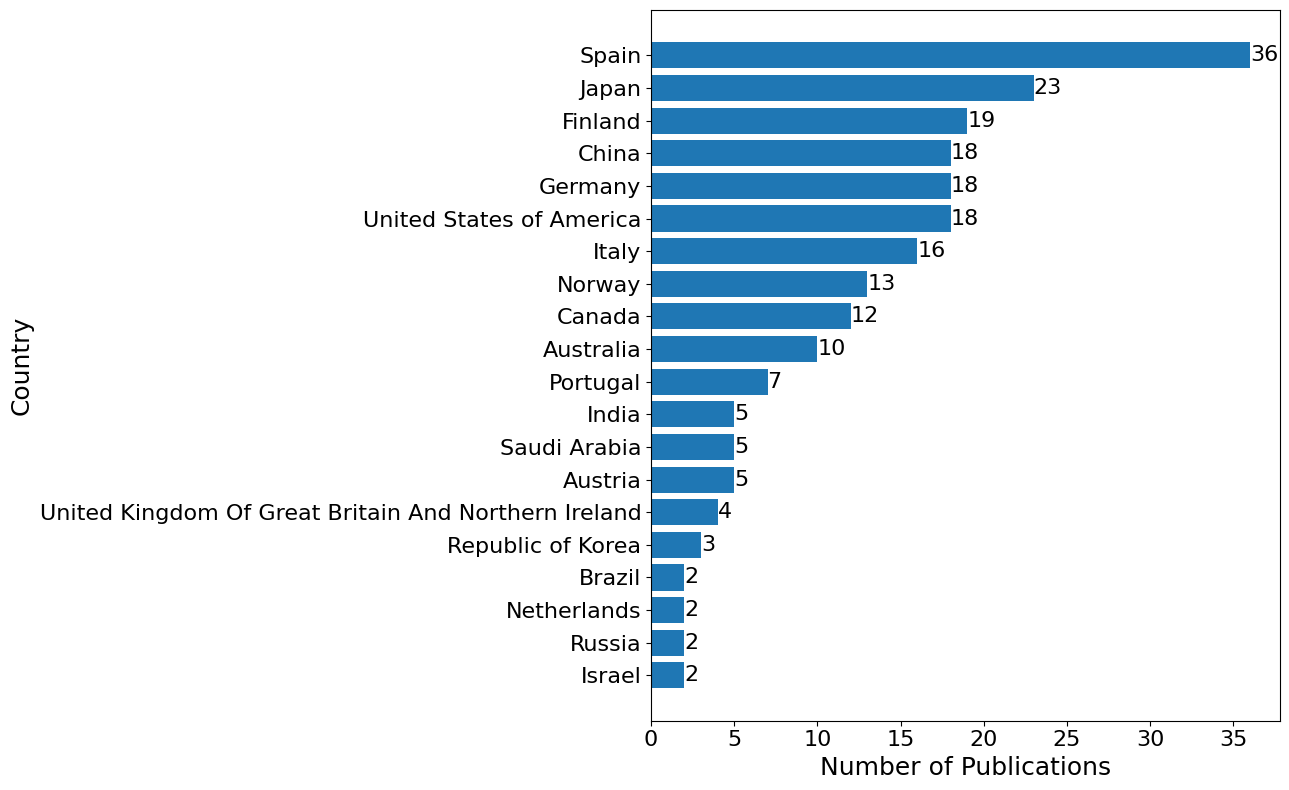

In [22]:
# Remover valores ausentes e limpar espaços extras
aff = aff.dropna(subset=['ID', 'Country'])
aff['Country'] = aff['Country'].str.strip()

# Agrupar países unicamente por artigo (ID)
article_country = aff.groupby('ID')['Country'].apply(lambda x: set(x)).reset_index()
article_country_exploded = article_country.explode('Country')

# Contar ocorrências por país
country_counts = article_country_exploded['Country'].value_counts().head(20).reset_index()
country_counts.columns = ['Country', 'Number of Publications']

# Criar gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(13, 8))
bars = ax.barh(country_counts['Country'], country_counts['Number of Publications'], color='#1f77b4')

# Inverter eixo Y para mostrar o país com mais publicações no topo
ax.invert_yaxis()

# Adicionar rótulos e título
ax.set_xlabel('Number of Publications', fontsize=18)
ax.set_ylabel('Country', fontsize=18)
ax.tick_params(axis='both', labelsize=16)

ax.grid(False)
for spine in ax.spines.values():  # define as bordas pretas
    spine.set_edgecolor('black')

# Inserir os valores no final das barras
for i, v in enumerate(country_counts['Number of Publications']):
    ax.text(v + 0, i, str(v), va='center', fontsize=16)

plt.tight_layout()
plt.show()

# Export
fig.savefig('chart_countries.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [23]:
for index, row in country_counts.iterrows():
    print(f"{row['Country']}: {int(row['Number of Publications'])}")

Spain: 36
Japan: 23
Finland: 19
China: 18
Germany: 18
United States of America: 18
Italy: 16
Norway: 13
Canada: 12
Australia: 10
Portugal: 7
India: 5
Saudi Arabia: 5
Austria: 5
United Kingdom Of Great Britain And Northern Ireland: 4
Republic of Korea: 3
Brazil: 2
Netherlands: 2
Russia: 2
Israel: 2


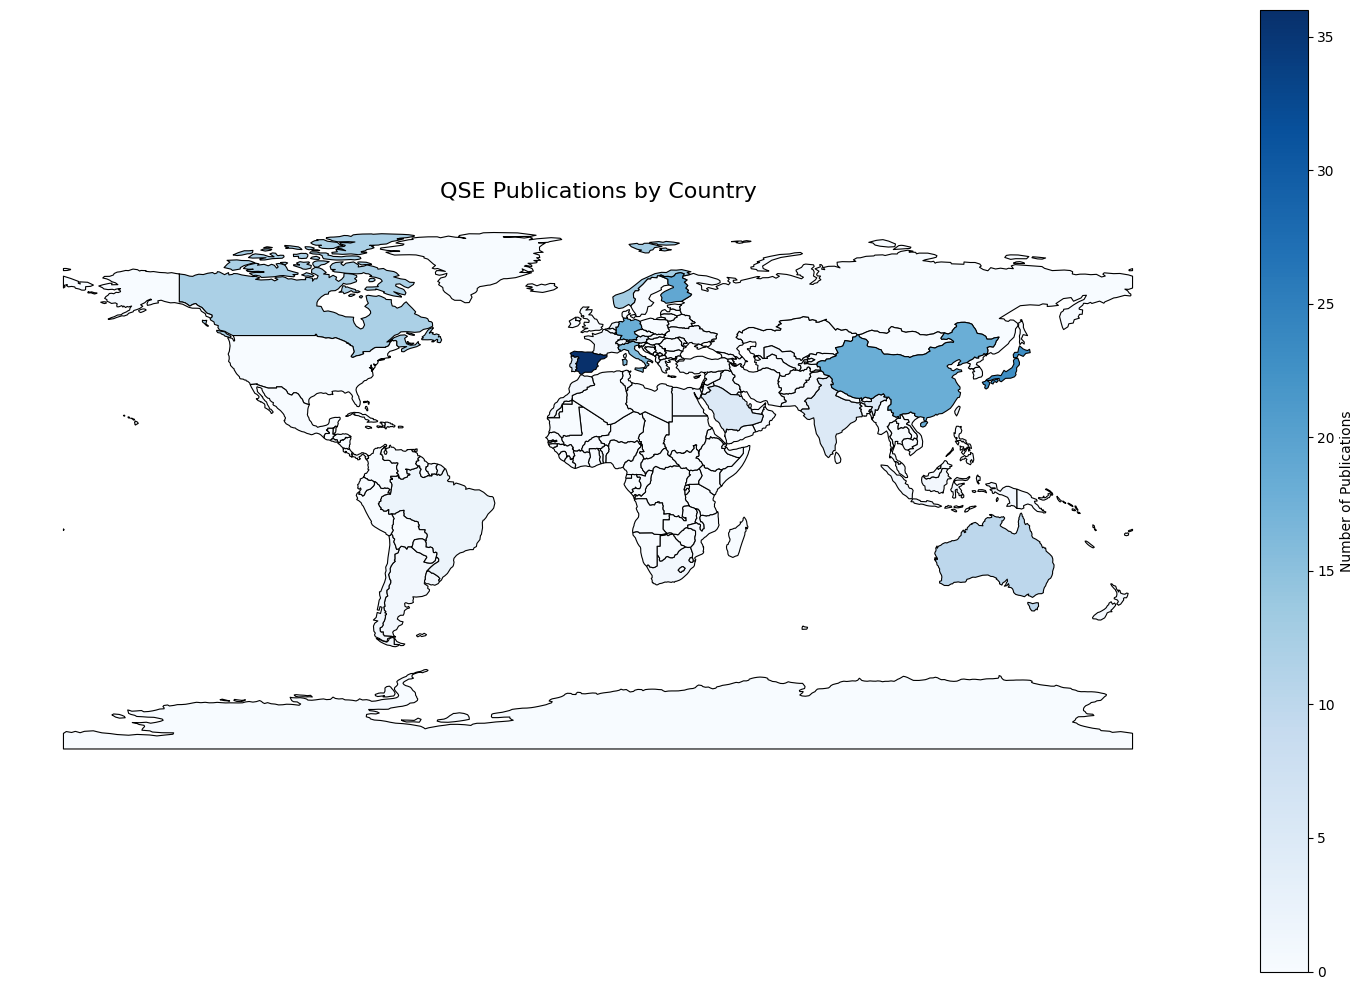

In [24]:
aff = aff.dropna(subset=['ID', 'Country'])

# === Normalize country names ===
aff['Country'] = aff['Country'].str.strip().str.title()

# === Rename non-standard country names to match geopandas ===
country_rename = {
    'United States': 'United States Of America',
    'Russia': 'Russian Federation',
    'South Korea': 'Republic Of Korea',
    'North Korea': "Democratic People's Republic Of Korea",
    'Iran': 'Iran (Islamic Republic Of)',
    'Syria': 'Syrian Arab Republic',
    'Vietnam': 'Viet Nam',
    'Laos': "Lao People's Democratic Republic",
    'Czech Republic': 'Czechia',
    'Ivory Coast': "Côte D'Ivoire",
    'Cape Verde': 'Cabo Verde',
    'Swaziland': 'Eswatini',
    'Palestine': 'Palestine, State Of',
    'Macedonia': 'North Macedonia',
    'Brunei': 'Brunei Darussalam',
    'Libya': 'Libyan Arab Jamahiriya',
    'Slovakia': 'Slovak Republic',
    'Democratic Republic Of The Congo': 'Democratic Republic Of The Congo',
    'Republic Of The Congo': 'Republic Of The Congo',
    'United Kingdom': 'United Kingdom Of Great Britain And Northern Ireland'
}
aff['Country'] = aff['Country'].replace(country_rename)

# === Group by unique countries per article ===
article_country = aff.groupby('ID')['Country'].apply(lambda x: set(x)).reset_index()
article_country_exploded = article_country.explode('Country')
country_counts = article_country_exploded['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# === Load world map ===
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# === Merge publication counts with world map ===
world_merged = world.merge(country_counts, how='left', left_on='ADMIN', right_on='Country')
world_merged['Count'] = world_merged['Count'].fillna(0)

# === Plot the map ===
fig, ax = plt.subplots(figsize=(15, 10))
world_merged.plot(
    column='Count',
    cmap='Blues',
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Number of Publications", 'orientation': "vertical"}
)

# === Customize ===
ax.set_title('QSE Publications by Country', fontsize=16)
ax.axis('off')

# === Save as PDF ===
plt.tight_layout()
plt.savefig('chart_qse_world_map.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## RQ1.4 - What are the most frequent publication venues?

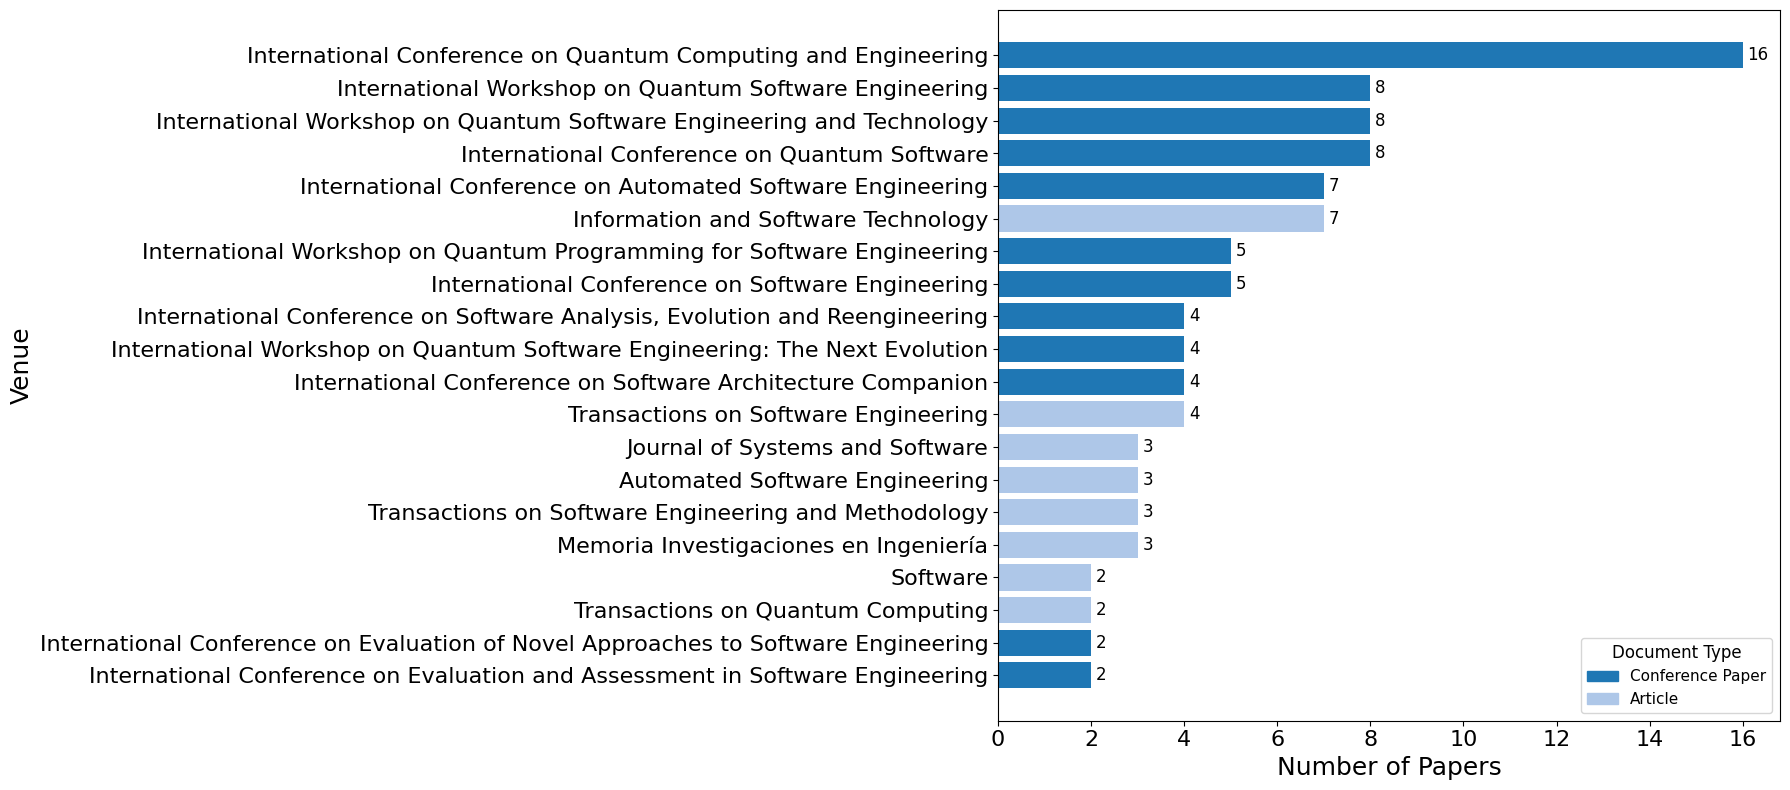

In [25]:
# Prepare data
df = papers[['Source Title', 'Document Type']].dropna()
df['Source Title'] = df['Source Title'].str.strip()

# Count total occurrences per source
source_counts = df['Source Title'].value_counts().head(20)
top_sources = source_counts.index.tolist()

# Filter dataset
df_top = df[df['Source Title'].isin(top_sources)]

# Get dominant Document Type per Source Title
dominant_type = df_top.groupby('Source Title')['Document Type'].agg(lambda x: x.value_counts().idxmax()).reset_index()
dominant_type.columns = ['Source Title', 'Document Type']

# Merge with frequency
dominant_type['Frequency'] = dominant_type['Source Title'].map(source_counts)

# Sort alphabetically (Y axis: top to bottom)
dominant_type = dominant_type.sort_values('Frequency', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(18, 8))

colors = {
    doc_type: color for doc_type, color in zip(
        dominant_type['Document Type'].unique(),
        plt.cm.tab20.colors  # Up to 20 distinct colors
    )
}

bars = ax.barh(
    dominant_type['Source Title'],
    dominant_type['Frequency'],
    color=[colors[dt] for dt in dominant_type['Document Type']]
)

# Add data labels
for bar, freq in zip(bars, dominant_type['Frequency']):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
            str(freq), va='center', fontsize=12)

# Labels and styling
ax.set_xlabel('Number of Papers', fontsize=18)
ax.set_ylabel('Venue', fontsize=18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

# Legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=colors[dt], label=dt) for dt in colors]
ax.legend(handles=legend_handles, title='Document Type', fontsize=11, title_fontsize=12)

plt.tight_layout()
plt.show()

# Export
fig.savefig('chart_venues.pdf', format='pdf', dpi=300, bbox_inches='tight')

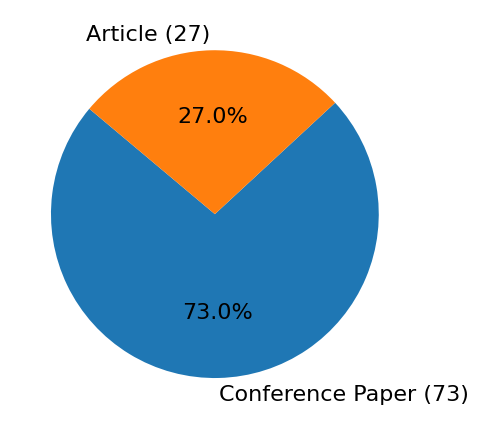

In [26]:
# Drop rows with missing values
df = papers[['Source Title', 'Document Type']].dropna()

# Normalize source titles
df['Source Title'] = df['Source Title'].str.strip()

# Get top 20 Source Titles
top_sources = df['Source Title'].value_counts().head(20).index

# Filter dataset
df_top = df[df['Source Title'].isin(top_sources)]

# Count Document Types
doc_type_counts = df_top['Document Type'].value_counts()

# Prepare labels with total count
labels = [f"{doc_type} ({count})" for doc_type, count in doc_type_counts.items()]

# Plot pie chart
fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    doc_type_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 18}
)

# Customize label and autopct fonts
for text in texts:
    text.set_fontsize(16)
for autotext in autotexts:
    autotext.set_fontsize(16)

plt.tight_layout()
plt.show()

# Optional export
fig.savefig('chart_documenttype.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [27]:
for i, row in dominant_type.iterrows():
    print(f"{row['Source Title']}: {int(row['Frequency'])}")

International Conference on Evaluation and Assessment in Software Engineering: 2
International Conference on Evaluation of Novel Approaches to Software Engineering: 2
Transactions on Quantum Computing: 2
Software: 2
Memoria Investigaciones en Ingeniería: 3
Transactions on Software Engineering and Methodology: 3
Automated Software Engineering: 3
Journal of Systems and Software: 3
Transactions on Software Engineering: 4
International Conference on Software Architecture Companion: 4
International Workshop on Quantum Software Engineering: The Next Evolution: 4
International Conference on Software Analysis, Evolution and Reengineering: 4
International Conference on Software Engineering: 5
International Workshop on Quantum Programming for Software Engineering: 5
Information and Software Technology: 7
International Conference on Automated Software Engineering: 7
International Conference on Quantum Software: 8
International Workshop on Quantum Software Engineering and Technology: 8
Internation

In [28]:
doc_type_counts = df_top['Document Type'].value_counts()
for doc_type, count in doc_type_counts.items():
    print(f"{doc_type}: {count}")

Conference Paper: 73
Article: 27


## RQ1.5 - Which types of studies and research strategies are most prevalent?

In [29]:
# Count frequency of each Type of Study
type_of_study_counts = papers['Type of Study'].dropna().value_counts()

# Display the result
print("Frequency of 'Type of Study':\n")
for study_type, count in type_of_study_counts.items():
    print(f"{study_type}: {count}")

Frequency of 'Type of Study':

Primary Study: 167


In [30]:
# # Filter only primary studies
# primary_studies = papers[papers['Type of Study'].str.strip().str.lower() == 'primary study']

# # Clean Research Type: drop NaNs and empty strings
# filtered = primary_studies['Research Type of Primary Studies'].dropna()
# filtered = filtered[filtered.str.strip() != '']

# # Count frequencies
# research_type_counts = filtered.value_counts()

# # Sort alphabetically by index (i.e., by research type)
# research_type_counts = research_type_counts.sort_index(ascending=True)

# # Plot horizontal bar chart
# fig, ax = plt.subplots(figsize=(9.5, 3))

# bars = ax.barh(
#     research_type_counts.index,
#     research_type_counts.values
# )

# # Axis labels and title
# ax.set_xlabel('Number of Papers', fontsize=18)
# ax.set_ylabel('Research Type', fontsize=18)
# ax.tick_params(axis='y', labelsize=16)
# ax.tick_params(axis='x', labelsize=16)

# # Add value labels next to bars
# for i, value in enumerate(research_type_counts.values):
#     ax.text(value, i, str(value), va='center', fontsize=16)

# plt.tight_layout()
# plt.show()

# # Export
# # fig.savefig('chart_researchtype_bar.pdf', format='pdf', dpi=300, bbox_inches='tight')

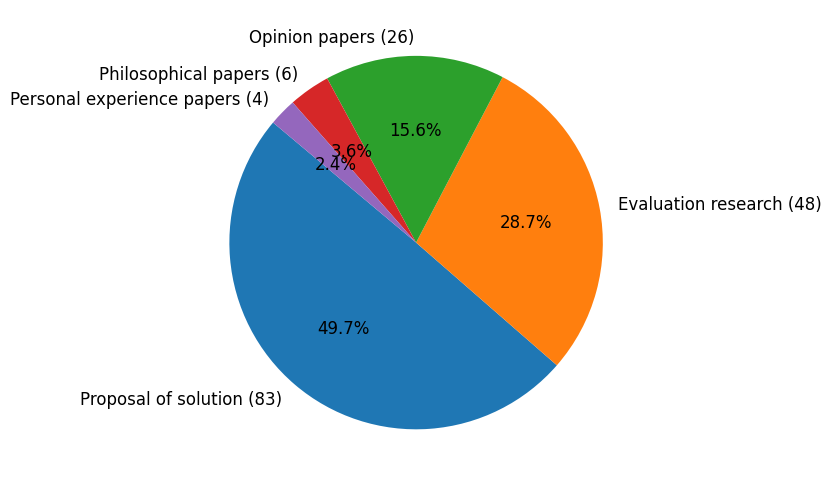

In [31]:
# Filter only primary studies
primary_studies = papers[papers['Type of Study'].str.strip().str.lower() == 'primary study']

# Clean Research Type: drop NaNs and empty strings
filtered = primary_studies['Research Type of Primary Studies'].dropna()
filtered = filtered[filtered.str.strip() != '']

# Count frequencies
research_type_counts = filtered.value_counts()

# Prepare labels with count
labels = [f"{label} ({count})" for label, count in zip(research_type_counts.index, research_type_counts.values)]

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    research_type_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)

plt.tight_layout()
plt.show()

# Export
fig.savefig('chart_researchtype_pie.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [32]:
for research_type, count in research_type_counts.items():
    print(f"{research_type}: {count}")

Proposal of solution: 83
Evaluation research: 48
Opinion papers: 26
Philosophical papers: 6
Personal experience papers: 4


## RQ2.1 - What areas of SWEBOK are most frequently addressed in QSE research?

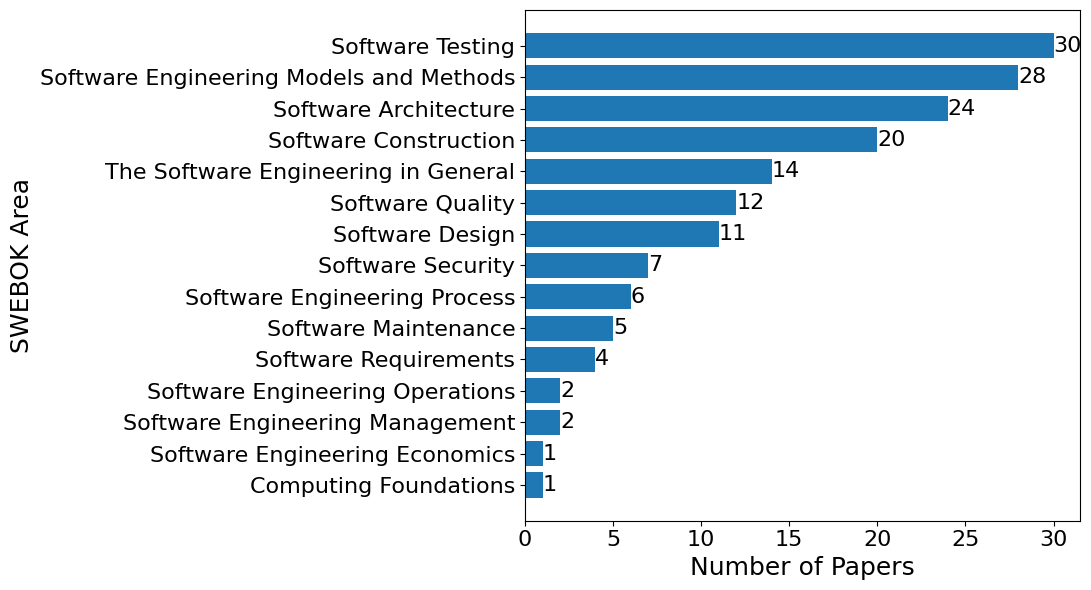

In [33]:
# Clean and filter the SWEBOK column
filtered = papers['SWEBOK'].dropna()
filtered = filtered[filtered.str.strip() != '']

# Count frequency and sort alphabetically
swebok_counts = filtered.value_counts()
swebok_counts = filtered.value_counts().sort_values(ascending=True)


# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(11,6))

bars = ax.barh(
    swebok_counts.index,
    swebok_counts.values
)

# Axis labels and title
ax.set_xlabel('Number of Papers', fontsize=18)
ax.set_ylabel('SWEBOK Area', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


# Add value labels next to bars
for i, value in enumerate(swebok_counts.values):
    ax.text(value, i, str(value), va='center', fontsize=16)

plt.tight_layout()
plt.show()

# Export
fig.savefig('chart_swebok.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [34]:
for area, count in swebok_counts.items():
    print(f"{area}: {count}")

Computing Foundations: 1
Software Engineering Economics: 1
Software Engineering Management: 2
Software Engineering Operations: 2
Software Requirements: 4
Software Maintenance: 5
Software Engineering Process: 6
Software Security: 7
Software Design: 11
Software Quality: 12
The Software Engineering in General: 14
Software Construction: 20
Software Architecture: 24
Software Engineering Models and Methods: 28
Software Testing: 30


## RQ2.2 - What are the main contributions and challenges reported in the literature?

### Contributions

In [35]:
# # Load the 'Contributions Category' column and drop missing values
# contrib_raw = papers['Contributions Category'].dropna()

# # Split categories by ';', remove leading/trailing whitespace, and normalize capitalization
# all_contribs = contrib_raw.apply(lambda x: [c.strip().title() for c in x.split(';')])

# # Flatten the list of lists into a single list
# flat_contribs = [item for sublist in all_contribs for item in sublist]

# # Count the frequency of each unique contribution category
# contrib_counts = Counter(flat_contribs)
# contrib_counts = dict(sorted(contrib_counts.items(), key=lambda x: x[1], reverse=True))  # Sort descending

# # Prepare data for plotting
# categories = list(contrib_counts.keys())
# frequencies = list(contrib_counts.values())

# # Create the horizontal bar chart
# fig, ax = plt.subplots(figsize=(10, 6))
# bars = ax.barh(categories, frequencies)

# # Reverse the Y-axis so the most frequent appears on top
# ax.invert_yaxis()

# # Axis labels and title
# ax.set_xlabel('Number of Papers', fontsize=18)
# ax.tick_params(axis='x', labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# # Add the frequency value next to each bar
# for i, v in enumerate(frequencies):
#     ax.text(v + 0.1, i, str(v), va='center', fontsize=16)

# plt.tight_layout()
# plt.show()

# # Export
# fig.savefig('chart_contributions.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [36]:
# from collections import Counter

# # Step 1: Drop missing values
# contrib_raw = papers['Contributions Category'].dropna()

# # Step 2: Split by ';' and normalize
# all_contribs = contrib_raw.apply(lambda x: [c.strip().lower() for c in x.split(';')])

# # Step 3: Flatten the list of all terms
# flat_contribs = [item for sublist in all_contribs for item in sublist]

# # Step 4: Count frequencies
# contrib_counts = Counter(flat_contribs)

# # Step 5: Sort and display
# contrib_counts_sorted = dict(sorted(contrib_counts.items(), key=lambda x: x[1], reverse=True))

# # Print result
# print("Normalized Contribution Categories:\n")
# for category, count in contrib_counts_sorted.items():
#     print(f"{category}: {count}")

### Challenges

In [37]:
# # Load the 'Challenges Category' column and drop missing values
# challenges_raw = papers['Challenges Category'].dropna()

# # Split categories by ';', strip spaces, and standardize capitalization
# all_challenges = challenges_raw.apply(lambda x: [c.strip().title() for c in x.split(';')])

# # Flatten the list of lists into a single list of all challenge tags
# flat_challenges = [item for sublist in all_challenges for item in sublist]

# # Count frequency of each unique challenge
# challenge_counts = Counter(flat_challenges)
# challenge_counts = dict(sorted(challenge_counts.items(), key=lambda x: x[1], reverse=True))  # Sort descending

# # Prepare data for plotting
# categories = list(challenge_counts.keys())
# frequencies = list(challenge_counts.values())

# # Create horizontal bar chart
# fig, ax = plt.subplots(figsize=(10, 6))
# bars = ax.barh(categories, frequencies)

# # Invert Y-axis to show most frequent category on top
# ax.invert_yaxis()

# # Axis labels and title
# ax.set_xlabel('Number of Papers', fontsize=18)
# ax.tick_params(axis='x', labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# # Add frequency labels next to each bar
# for i, v in enumerate(frequencies):
#     ax.text(v + 0.5, i, str(v), va='center', fontsize=12)

# plt.tight_layout()
# plt.show()

# # Export
# fig.savefig('chart_challenges.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [38]:
# for category, count in challenge_counts.items():
#     print(f"{category}: {count}")

## Discussions

### Temploral trends

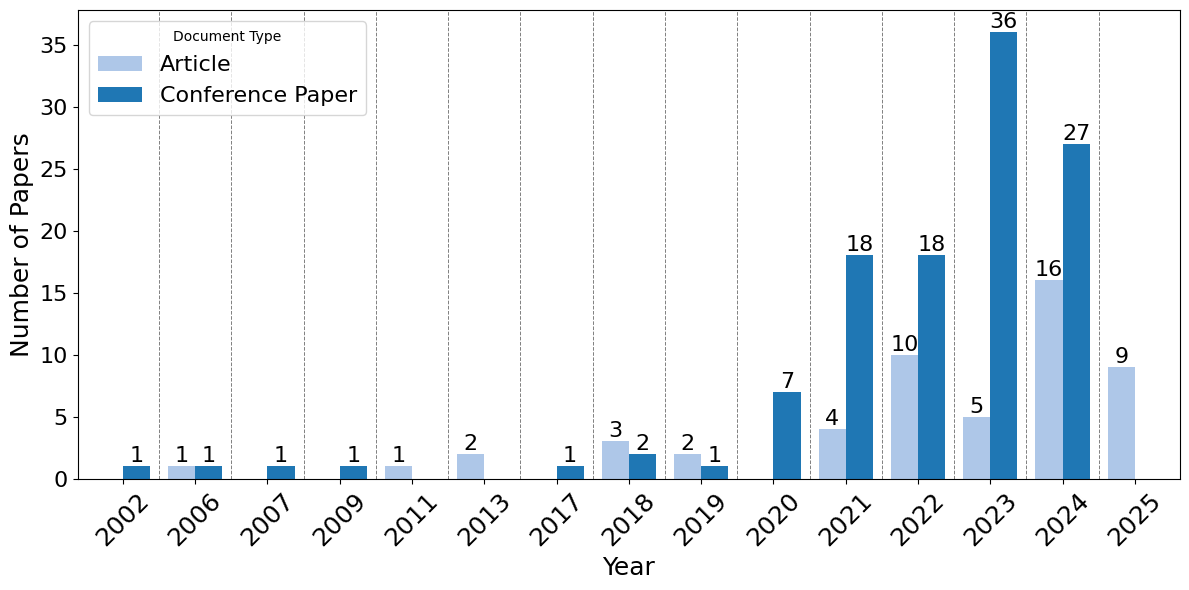

In [39]:
# Group by Year and Document Type
grouped = papers.groupby(['Year', 'Document Type']).size().unstack(fill_value=0)
grouped = grouped.sort_index()

# Define custom colors
color_map = {
    'Conference Paper': '#1f77b4',
    'Article': '#aec7e8'
}
colors = [color_map.get(col, 'gray') for col in grouped.columns]

# Plot grouped bar chart with figure reference for export
fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(
    kind='bar',
    width=0.75,
    color=colors,
    ax=ax
)

# Add vertical dotted lines between years
for i in range(len(grouped) - 1):
    ax.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.7)

# Add value labels on top of each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0,
                str(int(height)),
                ha='center',
                va='bottom',
                fontsize=16
            )

# Customize chart
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Papers', fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=16)
plt.legend(title='Document Type', fontsize=16)
plt.tight_layout()

# Show chart
plt.show()

# Save as PDF
fig.savefig('chart_year_doctype.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [40]:
# from google.colab import files
# files.download('chart_year_doctype.pdf')

In [41]:
grouped = papers.groupby(['Year', 'Document Type']).size().unstack(fill_value=0)
grouped = grouped.sort_index()

for year in grouped.index:
    print(f"\n{year}:")
    for doc_type in grouped.columns:
        count = grouped.loc[year, doc_type]
        print(f"  {doc_type}: {int(count)}")


2002:
  Article: 0
  Conference Paper: 1

2006:
  Article: 1
  Conference Paper: 1

2007:
  Article: 0
  Conference Paper: 1

2009:
  Article: 0
  Conference Paper: 1

2011:
  Article: 1
  Conference Paper: 0

2013:
  Article: 2
  Conference Paper: 0

2017:
  Article: 0
  Conference Paper: 1

2018:
  Article: 3
  Conference Paper: 2

2019:
  Article: 2
  Conference Paper: 1

2020:
  Article: 0
  Conference Paper: 7

2021:
  Article: 4
  Conference Paper: 18

2022:
  Article: 10
  Conference Paper: 18

2023:
  Article: 5
  Conference Paper: 36

2024:
  Article: 16
  Conference Paper: 27

2025:
  Article: 9
  Conference Paper: 0


### SWEBOK x Research Type of Primary Studies

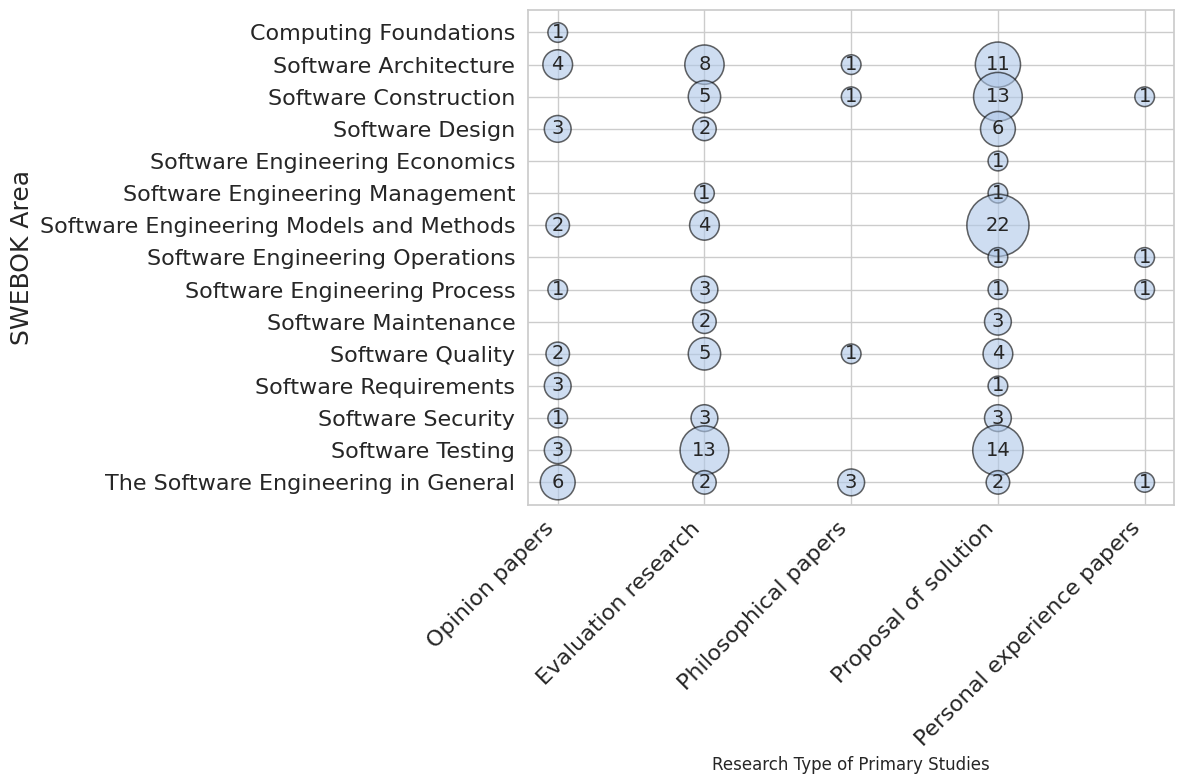

In [42]:
# Filter only primary studies
primary_studies = papers[papers['Type of Study'] == 'Primary Study']

# Group by SWEBOK and research type
grouped = primary_studies.groupby(['SWEBOK', 'Research Type of Primary Studies']).size().reset_index(name='Count')

# Create bubble chart
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
sns.scatterplot(
    data=grouped,
    x='Research Type of Primary Studies',
    y='SWEBOK',
    size='Count',
    sizes=(200, 2000),
    alpha=0.6,
    legend=False,
    edgecolor='black',
    color='#aec7e8'
)

# Add labels to bubbles
for i in range(grouped.shape[0]):
    plt.text(
        grouped['Research Type of Primary Studies'][i],
        grouped['SWEBOK'][i],
        str(grouped['Count'][i]),
        ha='center',
        va='center',
        fontsize=14
    )

# Customizations
plt.ylabel('SWEBOK Area', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# 🟡 First save, then show!
plt.savefig('chart_swebok_researchtype.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

In [43]:
for swebok_area in grouped['SWEBOK'].unique():
    print(f"\n{swebok_area}:")
    subset = grouped[grouped['SWEBOK'] == swebok_area]
    for _, row in subset.iterrows():
        print(f"  {row['Research Type of Primary Studies']}: {int(row['Count'])}")


Computing Foundations:
  Opinion papers: 1

Software Architecture:
  Evaluation research: 8
  Opinion papers: 4
  Philosophical papers: 1
  Proposal of solution: 11

Software Construction:
  Evaluation research: 5
  Personal experience papers: 1
  Philosophical papers: 1
  Proposal of solution: 13

Software Design:
  Evaluation research: 2
  Opinion papers: 3
  Proposal of solution: 6

Software Engineering Economics:
  Proposal of solution: 1

Software Engineering Management:
  Evaluation research: 1
  Proposal of solution: 1

Software Engineering Models and Methods:
  Evaluation research: 4
  Opinion papers: 2
  Proposal of solution: 22

Software Engineering Operations:
  Personal experience papers: 1
  Proposal of solution: 1

Software Engineering Process:
  Evaluation research: 3
  Opinion papers: 1
  Personal experience papers: 1
  Proposal of solution: 1

Software Maintenance:
  Evaluation research: 2
  Proposal of solution: 3

Software Quality:
  Evaluation research: 5
  Opinion

### Geographic and Institutional

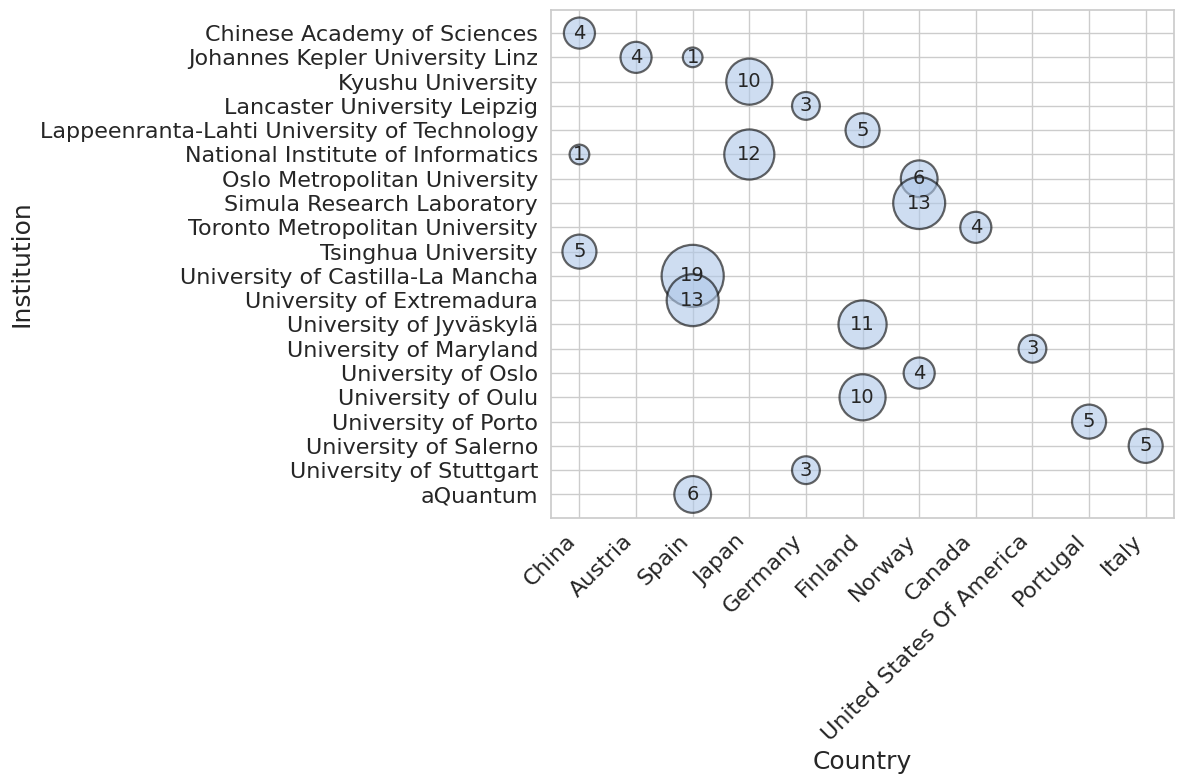

In [44]:

# Limpeza dos dados
aff = aff.dropna(subset=['ID', 'Institution', 'Country'])
aff['Institution'] = aff['Institution'].str.strip()
aff['Country'] = aff['Country'].str.strip()

# Identificar as 20 instituições com mais artigos únicos
top_institutions = aff.groupby('Institution')['ID'].nunique().sort_values(ascending=False).head(20).index
top_aff = aff[aff['Institution'].isin(top_institutions)]

# Remover duplicatas por artigo + instituição
top_aff_unique = top_aff.drop_duplicates(subset=['ID', 'Institution'])

# Agrupar por instituição e país e contar número de artigos
bubble_data = top_aff_unique.groupby(['Institution', 'Country'])['ID'].nunique().reset_index(name='Count')

# Criar gráfico de bolhas
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

sns.scatterplot(
    data=bubble_data,
    x='Country',
    y='Institution',
    size='Count',
    sizes=(200, 2000),
    alpha=0.6,
    legend=False,
    edgecolor='black',
    color='#aec7e8'
)

# Adicionar números dentro das bolhas
for i in range(bubble_data.shape[0]):
    plt.text(
        bubble_data['Country'].iloc[i],
        bubble_data['Institution'].iloc[i],
        str(bubble_data['Count'].iloc[i]),
        ha='center',
        va='center',
        fontsize=14
    )

# Ajustes visuais
plt.xlabel('Country', fontsize=18)
plt.ylabel('Institution', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
# plt.title('Top 20 Institutions by Country and Number of Publications', fontsize=16)

plt.tight_layout()

# Export
plt.savefig('chart_country_institution.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()


In [45]:
for _, row in bubble_data.iterrows():
    print(f"{row['Institution']} ({row['Country']}): {row['Count']} publications")

Chinese Academy of Sciences (China): 4 publications
Johannes Kepler University Linz (Austria): 4 publications
Johannes Kepler University Linz (Spain): 1 publications
Kyushu University (Japan): 10 publications
Lancaster University Leipzig (Germany): 3 publications
Lappeenranta-Lahti University of Technology (Finland): 5 publications
National Institute of Informatics (China): 1 publications
National Institute of Informatics (Japan): 12 publications
Oslo Metropolitan University (Norway): 6 publications
Simula Research Laboratory (Norway): 13 publications
Toronto Metropolitan University (Canada): 4 publications
Tsinghua University (China): 5 publications
University of Castilla-La Mancha (Spain): 19 publications
University of Extremadura (Spain): 13 publications
University of Jyväskylä (Finland): 11 publications
University of Maryland (United States Of America): 3 publications
University of Oslo (Norway): 4 publications
University of Oulu (Finland): 10 publications
University of Porto (Port

In [46]:
# Agrupar por país e somar os valores de Count
country_totals = bubble_data.groupby('Country')['Count'].sum().reset_index()

# Ordenar do maior para o menor
country_totals = country_totals.sort_values(by='Count', ascending=False)

# Exibir
for _, row in country_totals.iterrows():
    print(f"{row['Country']}: {row['Count']} publications")

Spain: 39 publications
Finland: 26 publications
Norway: 23 publications
Japan: 22 publications
China: 10 publications
Germany: 6 publications
Italy: 5 publications
Portugal: 5 publications
Austria: 4 publications
Canada: 4 publications
United States Of America: 3 publications


In [47]:
import pandas as pd

# Normaliza o nome do país (remove espaços e converte para minúsculas)
aff['Country'] = aff['Country'].astype(str).str.strip().str.lower()

# Filtra apenas linhas dos Estados Unidos (várias formas possíveis)
us_variants = ['usa', 'united states', 'united states of america', 'us']
us_aff = aff[aff['Country'].isin(us_variants)]

# Agrupa por instituição e conta artigos únicos
us_articles = (
    us_aff.groupby('Institution')['ID']
    .nunique()
    .reset_index(name='UniqueArticles')
    .sort_values(by='UniqueArticles', ascending=False)
)

# Exibe os resultados
for _, row in us_articles.iterrows():
    print(f"{row['Institution']}: {row['UniqueArticles']} unique articles")

University of California: 3 unique articles
University of Maryland: 3 unique articles
University of Chicago: 2 unique articles
Microsoft Quantum: 2 unique articles
Duke University: 2 unique articles
City University of New York: 1 unique articles
Columbia University: 1 unique articles
MIT Media Lab: 1 unique articles
Kennesaw State University: 1 unique articles
IBM: 1 unique articles
North Carolina State University: 1 unique articles
Microsoft Research: 1 unique articles
Massachusetts Institute of Technology: 1 unique articles
Oakland University: 1 unique articles
Oak Ridge National Laboratory: 1 unique articles
University of Michigan: 1 unique articles
Yale University: 1 unique articles
﻿AT&T Labs Research: 1 unique articles
